# <i>KMeans Clustering of the <u>Fisher's</u> Iris Flower Dataset</i>
### <i>Sepal length and width</i>

In [1]:
# For easier debbugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
# 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom-made kmeans, notice 'Sklearn' and 'k_means'
from custom.k_means import KMeans

In [4]:
data = pd.read_csv('Iris.csv')
data.head()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### <i>Visualize the raw data</i>

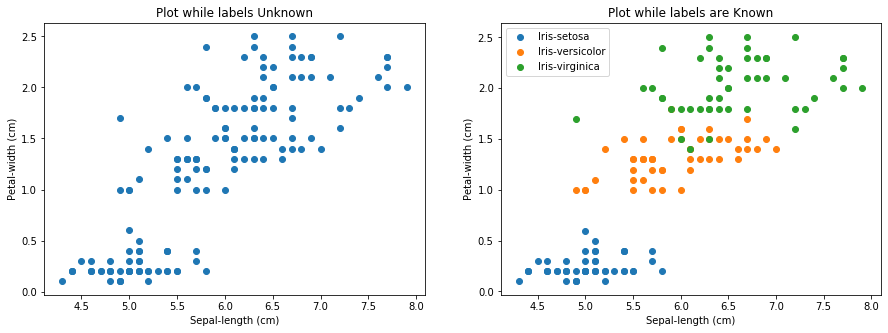

In [5]:
# Define axes and list of species
x_axis = 'Sepal-length'
y_axis = 'Petal-width'
species = data['Species'].unique()

# Initialize a figure
plt.figure(figsize = (15, 5))

# First plot on figure
plt.subplot(1, 2, 1)
plt.scatter(
    data[x_axis], 
    data[y_axis]
    )
plt.title('Plot while labels Unknown')
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')

# Second plot on figure
plt.subplot(1, 2, 2)
for kind in species:
    plt.scatter(
        data[x_axis][data['Species'] == kind],
        data[y_axis][data['Species'] == kind],
        label = kind
    )
    plt.title('Plot while labels are Known')
    plt.xlabel(x_axis + ' (cm)')
    plt.ylabel(y_axis + ' (cm)')
    plt.legend()

# Display all figures
plt.show()

### <i>Prepare data for clustering</i>

In [6]:
# Obtain shape of the Dataframe
shape = data.shape[0]

# Reshape the training data...
# Reduce columns to 2 and omit the column names
x_train = data[[x_axis, y_axis]].values.reshape(shape, 2)

### <i>Initialize Clustering and Perfoming Training</i>

In [7]:
# Number of clusters into which to classify
clusters = 3

# Maximum number of iterations for training
max_iterations = 50

In [8]:
# Perfom the training
k_means = KMeans(x_train, clusters)

(centroids, closest_centroids_ids) = k_means.train(max_iterations)

## <i>Visualize the clusters<i>

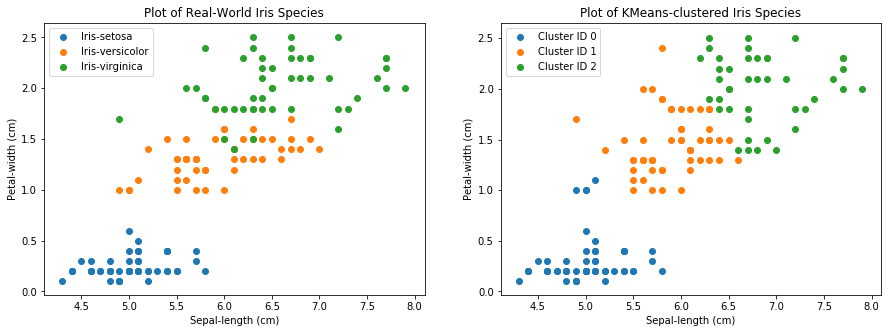

In [9]:
# Initialize a figure
plt.figure(figsize = (15, 5))

# First plot on figure
plt.subplot(1, 2, 1)
for kind in species:
    plt.scatter(
        data[x_axis][data['Species'] == kind],
        data[y_axis][data['Species'] == kind],
        label = kind
    )
    plt.title('Plot of Real-World Iris Species')
    plt.xlabel(x_axis + ' (cm)')
    plt.ylabel(y_axis + ' (cm)')
    plt.legend()
    
# Second plot on figure
plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][indices],
        data[y_axis][indices],
        label = 'Cluster ID ' + str(centroid_id)
    )  
    plt.scatter(
        centroid[0],
        centroid[1],
        marker = 'x',
        c = 'black',
        s = 0
    )
    plt.title('Plot of KMeans-clustered Iris Species')
    plt.xlabel(x_axis + ' (cm)')
    plt.ylabel(y_axis + ' (cm)')
    plt.legend()
# Display all figures
plt.show()